<a href="https://colab.research.google.com/github/Riab22209/CE880-Case-Study-repository/blob/main/CaseStudy_EDAandClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description
<br>
ID: ID Number of Customers.
<br>
Warehouse block:- The Company has Warehouse which is divided into blocks such as A,B,C,D,E.
<br>
Mode of shipment:-The Company has different modes of shipment such as Ship, Flight and Road.
<br>
Customer care calls:- The number of calls made by customers for enquiries.
<br>
Customer rating:- Ratings from the customer. 1 is the lowest (Worst), 5 is the highest (Best).
<br>
Cost of the product-: Cost of the Product in US Dollars.
<br>
Prior purchases:- The Number of Prior Purchases.
<br>
Product importance:- The products are categorized into three categories such as low, medium and high.
<br>
Gender:- Male and Female.
<br>
Discount offered:- Discount offered on that specific product.
<br>
Weight in gms:- It is the weight of the product in grams.
<br>
Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# Load the data

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_shipping.xlsx to Data_shipping.xlsx


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from pd.tools import plotting
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
filename ="Data_shipping.xlsx"
data = pd.read_excel(filename)
data


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,ROT_Y
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
#shape of the data
data.shape

(10999, 12)

In [ ]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  ROT_Y                10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#drop ID column
data.drop(['ID'], axis = 1, inplace = True)

#Correlation map

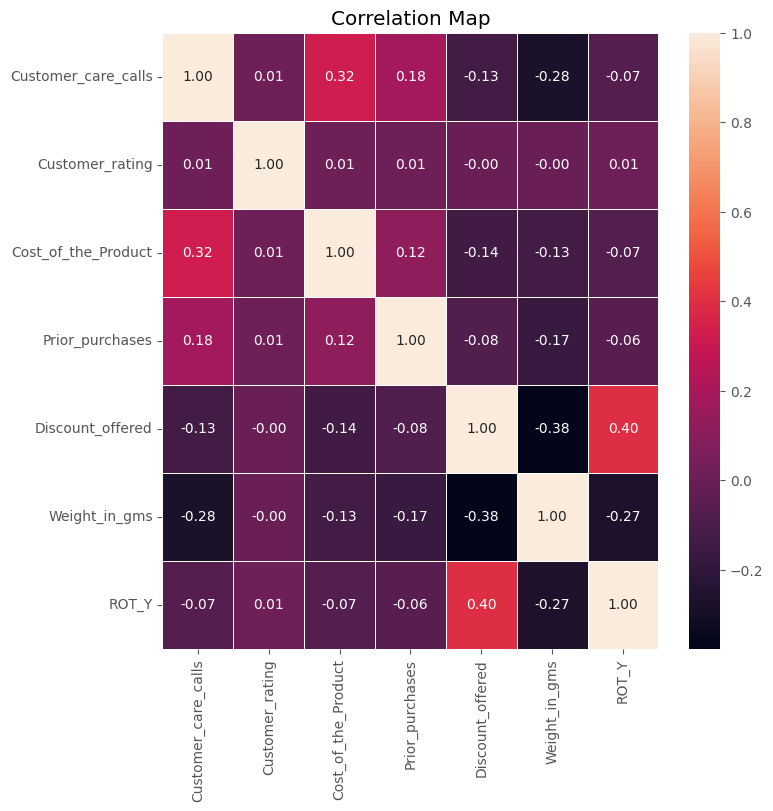

In [ ]:
#The range of these numbers are -1 to 1.If the number is positive that indicates the two variables are positively correlated.A negative value indicates that there is negative correlation and zero means there is no correlation.
f,ax=plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

From the correlation matrix it can be observed that the discount offered has a high positive correlation of 40% with Reached on Time or not(ROT_Y).
<br>
Weights in gms has a negative correlation of 27% with Reached on Time or not.(ROT_Y) 
<br>
Weights in gms and Discount_offered have a negative correlation of 38%.
<br>
Cost of Product and Customer Care Calls have a high positive correlation of 32%.
<br>
Customer Care Calls and Weights in gms have a negative correlation of 28%.
<br>
Prior purchases and customer care calls also have a positive correlation of 18% and prior purchases and cost of the product also have a positive correlation of 12%.

In [111]:
px.box(data_frame = data, x = 'ROT_Y', y = 'Discount_offered', 
       color = 'ROT_Y',height=500,width=800)

In [112]:
px.box(data_frame = data, x = 'ROT_Y', y = 'Weight_in_gms', 
       color = 'ROT_Y',height=500,width=800)

# Check for null values

In [ ]:
# check missing values in variables
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
ROT_Y                  0
dtype: int64

#Exploratory Data Analysis (EDA)

#Univariate Data Analysis

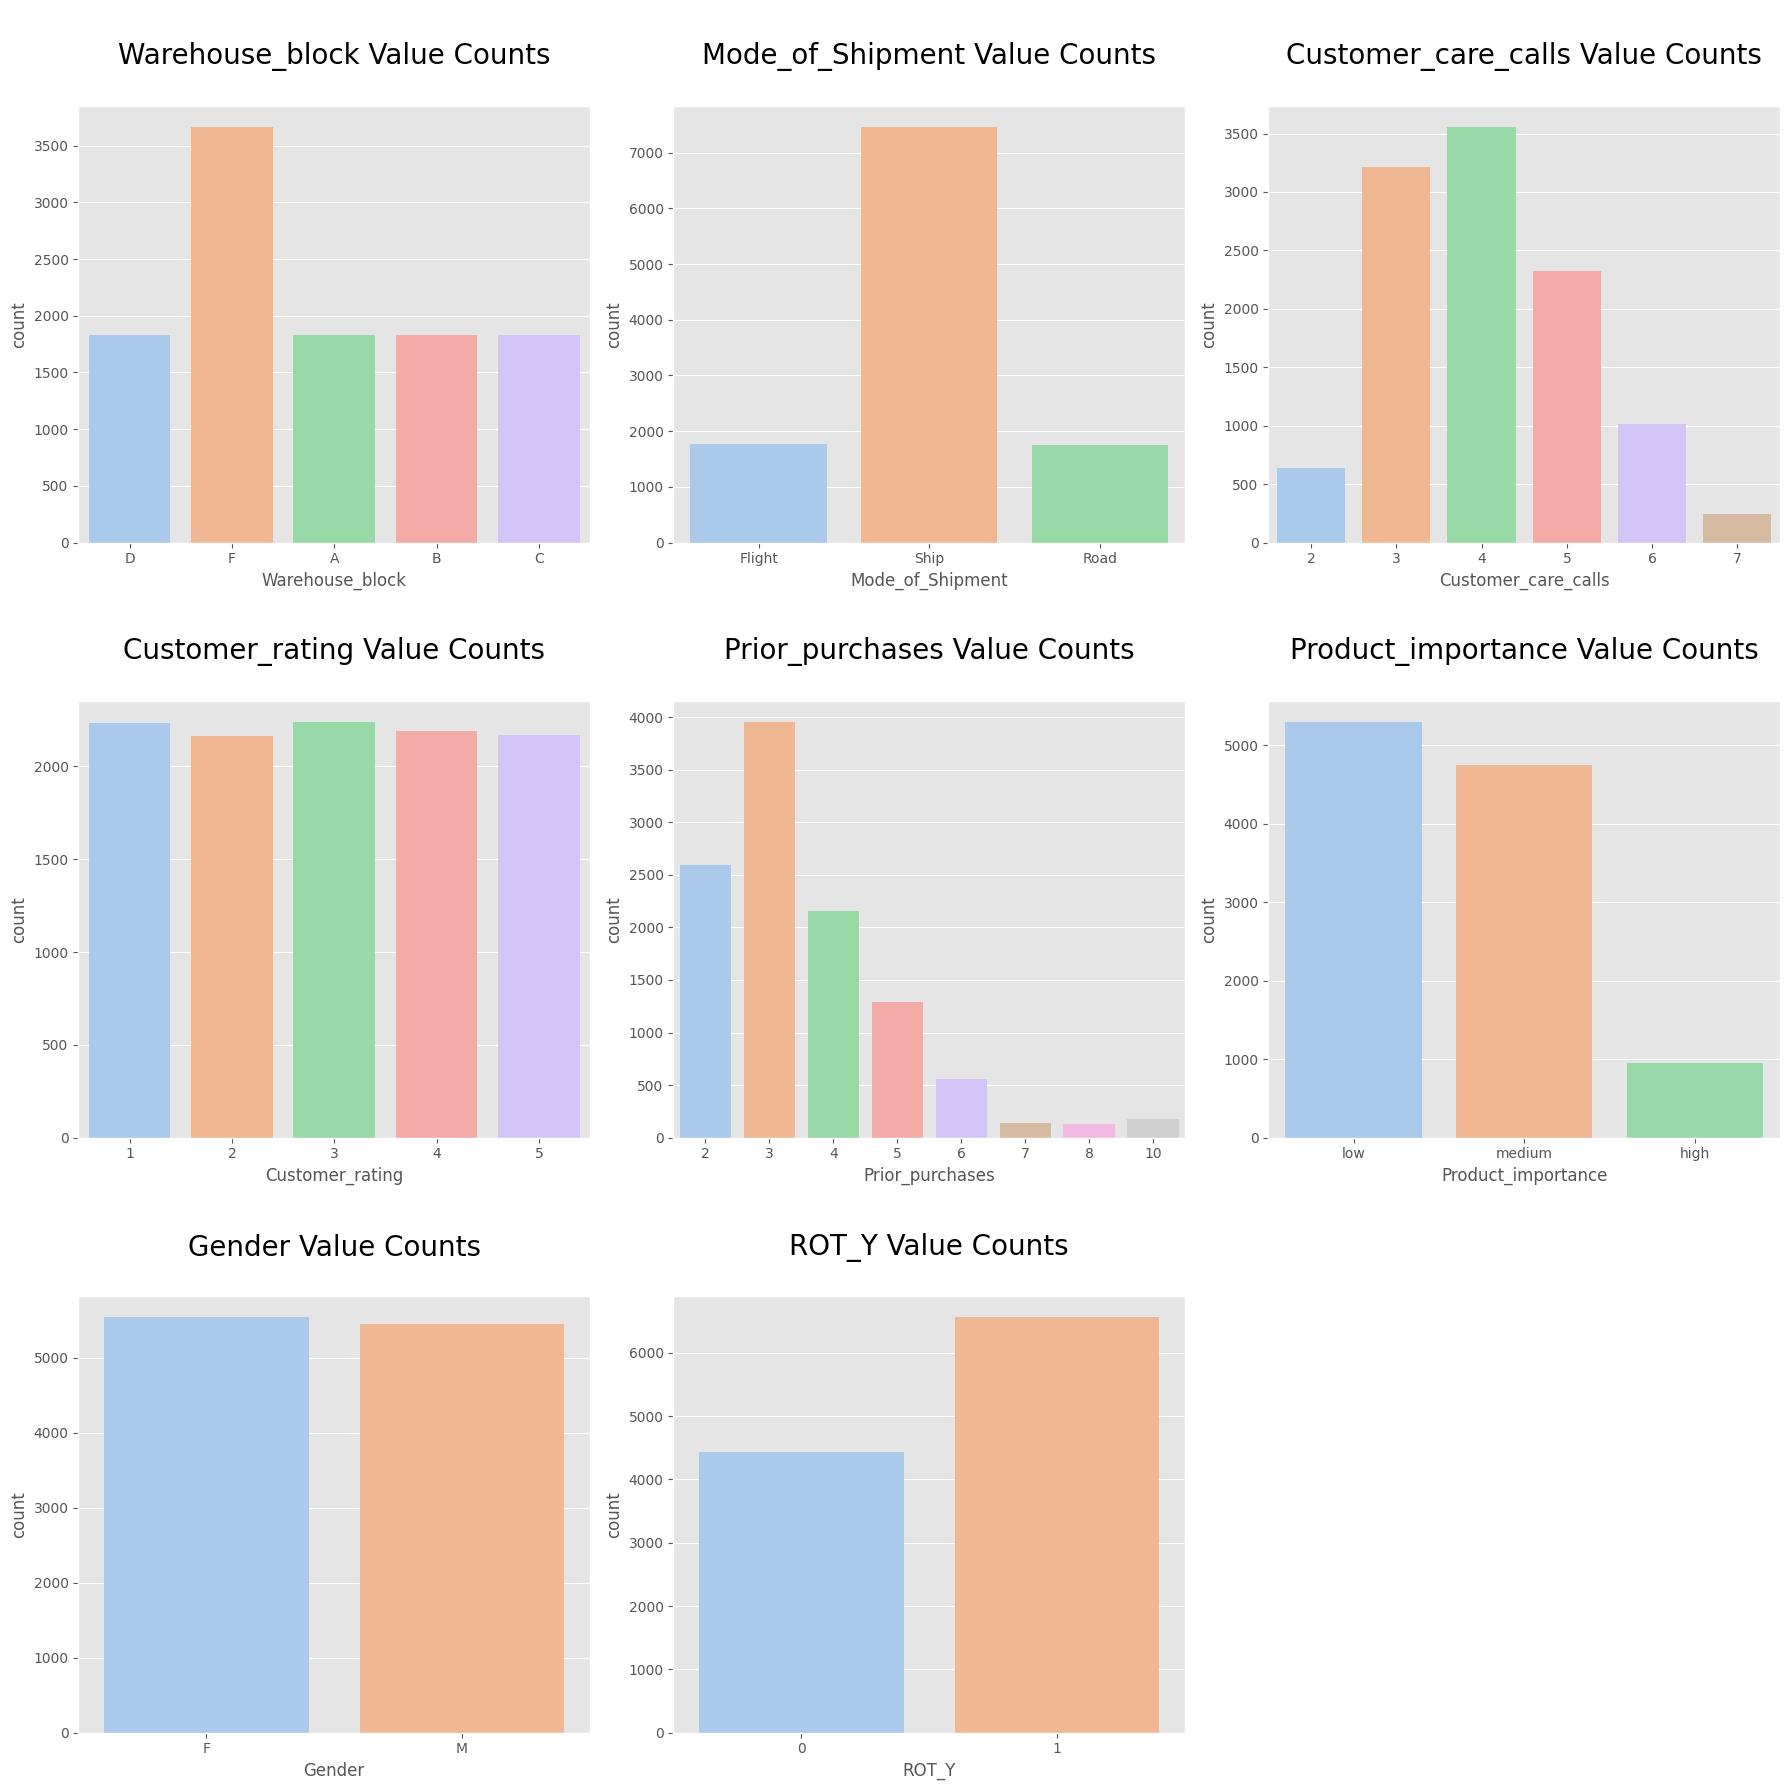

In [ ]:
#Checking the categorical columns data
# creating a list of categorical coumns
colsList = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'ROT_Y']

plt.figure(figsize = (18, 18))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(colsList)):
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x = colsList[i], data = data, ax = ax, palette='pastel')
        plt.title(f"\n{colsList[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

1.Warehouse F has the highest frequency among all the warehouses.
<br>
2.Ship is the most used mode of shipment over flight and road.
<br>
3.The maximum number of customer care calls is  followed by 3.
<br>
4.The count of the rating values from 1 to 5 are mostly same to each other and there is not much variation.
<br>
5.The most number of prior purchases is 3 followed by 2 and 4.
<br>
6.For product importance low has the highest count.
<br>
7.Gender doesnt have much difference in count for the two genders.
<br>
8.More products didnt reach on time than the number of products that reached on time.

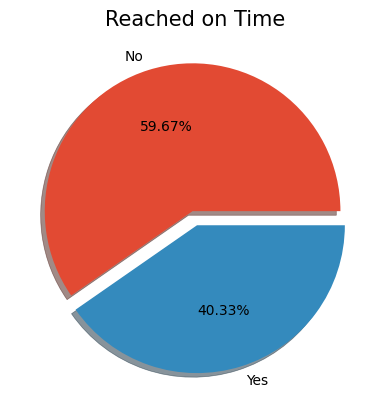

In [116]:
#The target variable is ROT_Y which has two value 0 amd 1,where 0 indicates it has reached on time and 1 indicates it hasnt reached on time
data['ROT_Y'].value_counts()
plt.pie(data['ROT_Y'].value_counts(), labels=['No', 'Yes'], explode=[0.05, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Reached on Time', fontsize=15)

plt.show()

#Bivariate Data Analysis

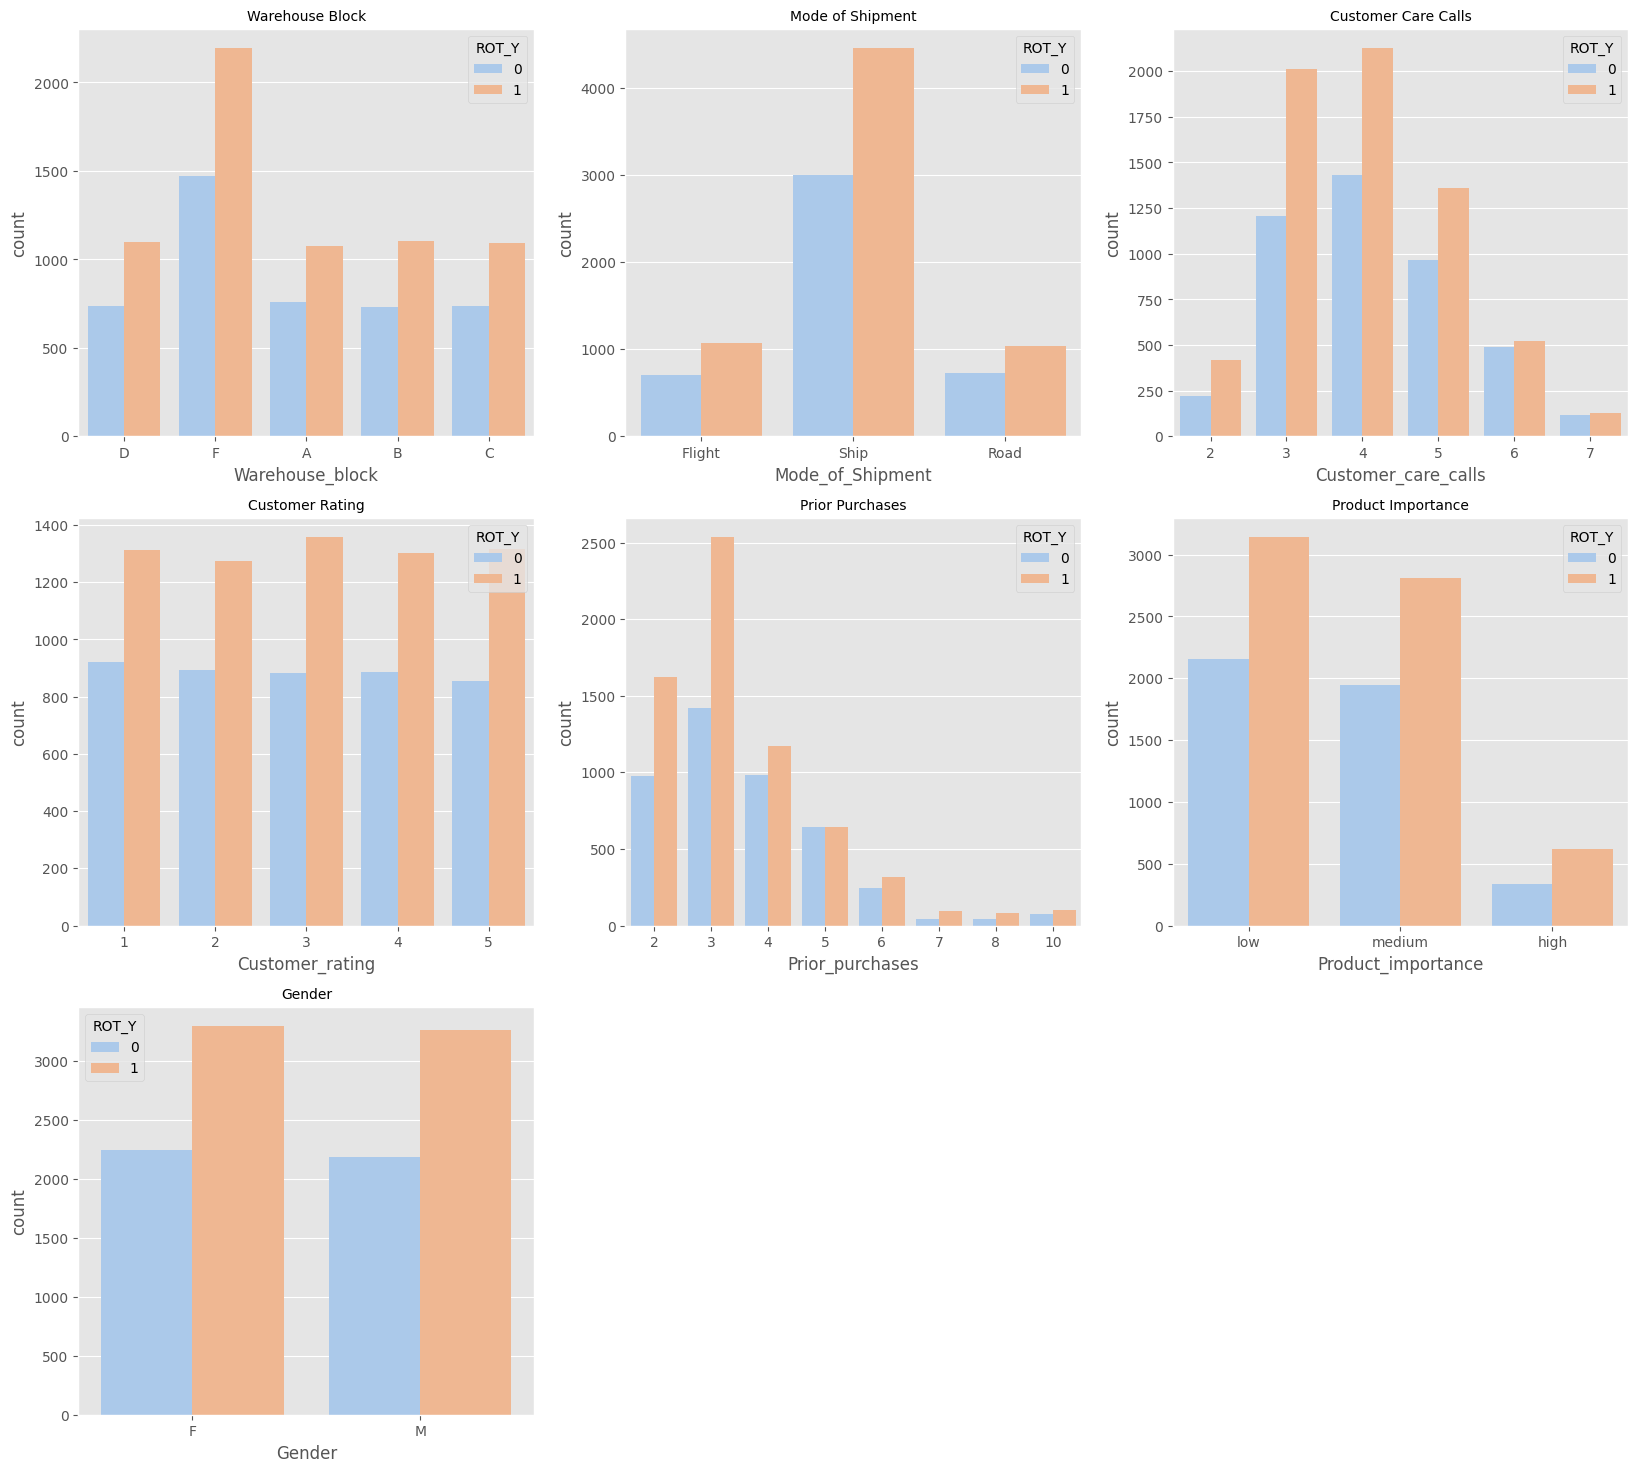

In [117]:
plt.figure(figsize=(20, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', hue='ROT_Y', data=data, palette='pastel')
plt.title('Warehouse Block', fontsize=10)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', hue='ROT_Y', data=data, palette='pastel')
plt.title('Mode of Shipment', fontsize=10)

plt.subplot(3, 3, 3)
sns.countplot(x='Customer_care_calls', hue='ROT_Y',  data=data, palette='pastel')
plt.title('Customer Care Calls', fontsize=10)

plt.subplot(3, 3, 4)
sns.countplot(x='Customer_rating', hue='ROT_Y',  data=data, palette='pastel')
plt.title('Customer Rating', fontsize=10)

plt.subplot(3, 3, 5)
sns.countplot(x='Prior_purchases', hue='ROT_Y',  data=data, palette='pastel')
plt.title('Prior Purchases', fontsize=10)

plt.subplot(3, 3, 6)
sns.countplot(x='Product_importance', hue='ROT_Y',  data=data, palette='pastel')
plt.title('Product Importance', fontsize=10)

plt.subplot(3, 3, 7)
sns.countplot(x='Gender', hue='ROT_Y',  data=data, palette='pastel')
plt.title('Gender', fontsize=10)

plt.show()

With all the categorical columns the count is more for the products that didnt reach on time.

#Numerical variables 

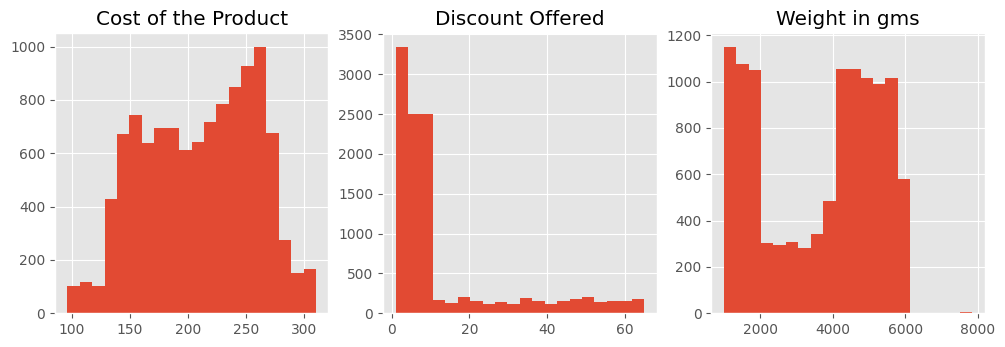

In [114]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(data['Cost_of_the_Product'], bins=20)
plt.title('Cost of the Product')

plt.subplot(2, 3, 2)
plt.hist(data['Discount_offered'], bins=20)
plt.title('Discount Offered')

plt.subplot(2, 3, 3)
plt.hist(data['Weight_in_gms'], bins=20)
plt.title('Weight in gms')

plt.show()

#Encode the categorical variables

In [ ]:
# import category encoders
!pip install category-encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.0 MB/s eta 0:00:00


In [ ]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating','Prior_purchases', 'Product_importance','Gender'])

#Train and Test Data sets

#Scaling the data

In [ ]:
#feature vector and target variable
X = data.drop(['ROT_Y'], axis=1)
y = data['ROT_Y']
X = encoder.fit_transform(X)
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X,),
        columns=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender','Discount_offered','Weight_in_gms'])
# split data into 80:20 training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((8799, 10), (2200, 10))

In [ ]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
# check data types in X_train
X_train.dtypes

Warehouse_block          int64
Mode_of_Shipment         int64
Customer_care_calls      int64
Customer_rating          int64
Cost_of_the_Product    float64
Prior_purchases          int64
Product_importance       int64
Gender                   int64
Discount_offered       float64
Weight_in_gms          float64
dtype: object

In [ ]:
X_train.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
8965,1,1,1,1,-0.669915,1,1,1,-0.393292,0.306355
5936,2,1,2,2,-0.170550,2,2,1,-0.640133,0.527109
10656,3,1,3,1,1.389964,1,2,2,-0.455002,-1.591153
3328,4,1,4,1,0.183166,3,2,2,-0.578423,0.400527
9880,4,2,2,2,1.785294,2,1,1,-0.578423,-1.213241


In [ ]:
X_test.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
107,1,1,5,1,0.120746,1,3,2,0.779201,-0.966804
5594,2,3,1,3,0.203973,1,1,1,-0.455002,1.185091
6997,1,2,1,4,0.099939,2,1,1,-0.640133,0.249485
3984,3,2,4,3,-1.044438,4,1,1,-0.763553,0.634735
3111,5,1,4,5,0.391235,3,2,1,1.889983,-0.742992


In [ ]:
model =  RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

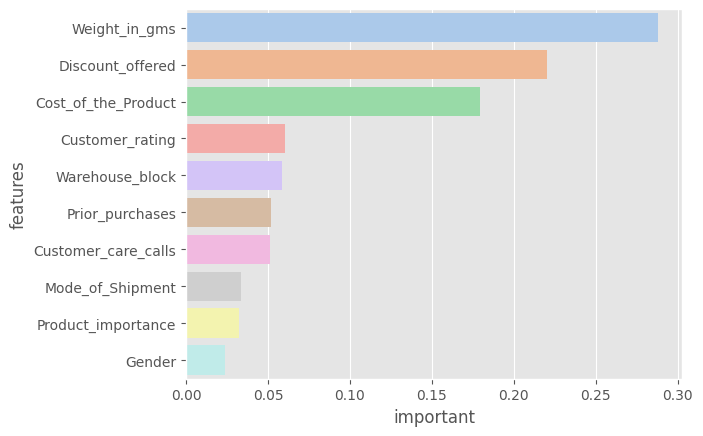

In [ ]:
# importance of variables
important_features = pd.DataFrame({'features': X_train.columns, 
                                   'important': model.feature_importances_})

important_features = important_features.sort_values('important', ascending = False)

sns.barplot(x = 'important', y = 'features', data = important_features,palette='pastel')


plt.show()

#Choosing the best parameters for the model

#Machine Learning models
1.K Nearest Neighbour(KNN)
<br>
2.Support Vector Classification(SVC)
<br>
3.XGBoost
<br>
4.Decision Trees
<br>
5.Random Forest
<br>
6.Logistic Regression
<br>
7.AdaBoost

In [ ]:
#gridsearch cross validation
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

#KNN

In [ ]:
gs_knn = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
print('Best parameters for KNN: ', gridsearch(gs_knn , knn_params))

Best parameters for KNN:  {'n_neighbors': 11}


#SVC

In [ ]:
svc_gs = SVC()
svc_params = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}
print(f'Best parameters for SVC: ', gridsearch(svc_gs , svc_params))

Best parameters for SVC:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}


#XGBoost

In [ ]:
xgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[100,300],
              'learning_rate':[0.1,0.2]} 
print(f'Best parameters for XGBoost: ', gridsearch(xgb_gs , xgb_params))

Best parameters for XGBoost:  {'learning_rate': 0.1, 'n_estimators': 100}


#Decision Tree

In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8]
dectree_params = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
print(f'Best parameters for Decision Tree: ', gridsearch(pipe , dectree_params))

Best parameters for Decision Tree:  {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 6, 'pca__n_components': 10}


#Random Forest

In [ ]:
gs_rf = RandomForestClassifier(random_state = 0)
rf_params = {
 'n_estimators':[200,500],
 'criterion': ('gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 9],
 'max_features': ("auto", "sqrt", "log2") }
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 9, 'n_estimators': 200}


#Logistic Regression

In [ ]:
gs_lr = LogisticRegression()
lr_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
print('Best parameters for Logistic Regression: ', gridsearch(gs_lr , lr_params))

Best parameters for Logistic Regression:  {'C': 0.01, 'penalty': 'l2'}


#AdaBoost

In [ ]:
gs_adb = AdaBoostClassifier(random_state = 0)
adb_params ={
    'n_estimators':[10, 50, 100, 250, 500, 1000],
    'learning_rate':[0.001, 0.01, 0.1, 1]}
print(f'Best parameters for AdaBoost: ', gridsearch(gs_adb , adb_params))

Best parameters for AdaBoost:  {'learning_rate': 0.1, 'n_estimators': 250}


#Build Models

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 11)
svc = SVC(kernel='linear', random_state=0, gamma=1, C=10)
xgb = XGBClassifier(random_state= 0 , learning_rate= 0.1 , n_estimators= 100)
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
rf  = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='log2' , min_samples_split= 9 , n_estimators= 200)
lr  = LogisticRegression(random_state=0, penalty = 'l2')
adb  = AdaBoostClassifier(n_estimators=250, learning_rate = 0.1, random_state=0)

#Model Metrics

In [ ]:
def creport(model):
    ypred = model.predict(X_test)
    return classification_report(y_test, ypred)    

In [50]:
KNN = knn
KNN.fit(X_train,y_train)
print(creport(KNN))


              precision    recall  f1-score   support

           0       0.54      0.61      0.57       895
           1       0.71      0.64      0.67      1305

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.63      2200



In [ ]:
SVC = svc
SVC.fit(X_train,y_train)
print(creport(SVC))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       895
           1       0.79      0.60      0.68      1305

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.70      0.67      0.67      2200



In [ ]:
XGB = xgb 
XGB.fit(X_train,y_train)
print(creport(XGB))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65       895
           1       0.78      0.61      0.69      1305

    accuracy                           0.67      2200
   macro avg       0.68      0.68      0.67      2200
weighted avg       0.70      0.67      0.67      2200



In [ ]:
DT = decision_tree 
DT.fit(X_train,y_train)
print(creport(DT))

              precision    recall  f1-score   support

           0       0.57      0.86      0.68       895
           1       0.85      0.55      0.67      1305

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.73      0.67      0.67      2200



In [47]:
RF = rf 
RF.fit(X_train,y_train)
print(creport(RF))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       895
           1       0.81      0.59      0.69      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.72      0.68      0.68      2200



In [48]:
LR = lr 
LR.fit(X_train,y_train)
print(creport(LR))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       895
           1       0.70      0.69      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [49]:
ADB = adb 
ADB.fit(X_train,y_train)
print(creport(ADB))

              precision    recall  f1-score   support

           0       0.58      0.78      0.66       895
           1       0.80      0.62      0.70      1305

    accuracy                           0.68      2200
   macro avg       0.69      0.70      0.68      2200
weighted avg       0.71      0.68      0.68      2200



#Evaluation of the models

In [51]:
y_train_pred_knn = KNN.predict(X_train)
y_train_pred_svc = SVC.predict(X_train)
y_train_pred_xgb = XGB.predict(X_train)
y_train_pred_dt = DT.predict(X_train)
y_train_pred_rf = RF.predict(X_train)
y_train_pred_lr = LR.predict(X_train)
y_train_pred_adb = ADB.predict(X_train)

In [52]:
y_test_pred_knn = KNN.predict(X_test)
y_test_pred_svc = SVC.predict(X_test)
y_test_pred_xgb = XGB.predict(X_test)
y_test_pred_dt = DT.predict(X_test)
y_test_pred_rf = RF.predict(X_test)
y_test_pred_lr = LR.predict(X_test)
y_test_pred_adb = ADB.predict(X_test)

In [59]:
def accuracy(y_test , ypred):
    return round(accuracy_score(y_test , ypred),2)

In [60]:
from sklearn.metrics import f1_score
def f1(y_test , ypred):
    return round(f1_score(y_test, ypred, average='macro'),2)

In [61]:
all_evaluate = pd.DataFrame({'Model':['KNN','SVC','XGBoost','Decison Trees','Random Forest','Logistic Regression', 'AdaBoost'],
    'Train Accuracy':[accuracy(y_train,y_train_pred_knn), accuracy(y_train,y_train_pred_svc), accuracy(y_train,y_train_pred_xgb),
                     accuracy(y_train,y_train_pred_dt), accuracy(y_train,y_train_pred_rf),accuracy(y_train,y_train_pred_lr),accuracy(y_train,y_train_pred_adb)],

    'Test Accuracy':[accuracy(y_test,y_test_pred_knn), accuracy(y_test,y_test_pred_svc), accuracy(y_test,y_test_pred_xgb),
                     accuracy(y_test,y_test_pred_dt), accuracy(y_test,y_test_pred_rf),accuracy(y_test,y_test_pred_lr),accuracy(y_test,y_test_pred_adb)],
                                      
    'f1-score':[f1(y_test,y_test_pred_knn), f1(y_test,y_test_pred_svc), f1(y_test,y_test_pred_xgb),f1(y_test,y_test_pred_dt),f1(y_test,y_test_pred_rf),
                f1(y_test,y_test_pred_lr),f1(y_test,y_test_pred_adb)]}
                     )

print(all_evaluate)

                 Model  Train Accuracy  Test Accuracy  f1-score
0                  KNN            0.73           0.63      0.62
1                  SVC            0.66           0.67      0.67
2              XGBoost            0.81           0.67      0.67
3        Decison Trees            0.70           0.67      0.67
4        Random Forest            0.68           0.68      0.68
5  Logistic Regression            0.64           0.64      0.63
6             AdaBoost            0.68           0.68      0.68


In [93]:
def confusion_matrix_plot(model):
    ypred = model.predict(X_test)
    cm = confusion_matrix(y_test, ypred)
    cm = np.rot90(cm , 2)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd',cmap="coolwarm", cbar = False, 
                linewidths = 0.1, annot_kws = {'size':10})
    plt.title('Confusion Matrix', fontsize = 15)

In [76]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_auc_plot(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr,label='r')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),2)))
    plt.grid(True)

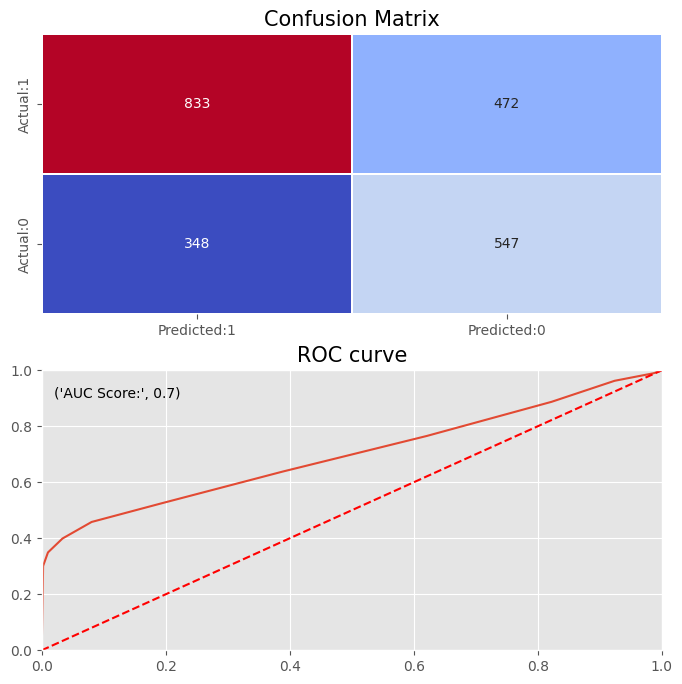

In [94]:
#KNN
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.subplot(2, 1, 1)
confusion_matrix_plot(knn)

plt.subplot(2, 1, 2)
roc_auc_plot(knn)

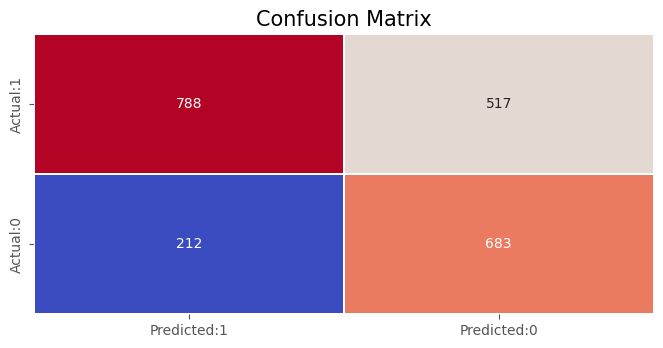

In [95]:
#SVC
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
plt.subplot(2, 1, 1)
confusion_matrix_plot(svc)

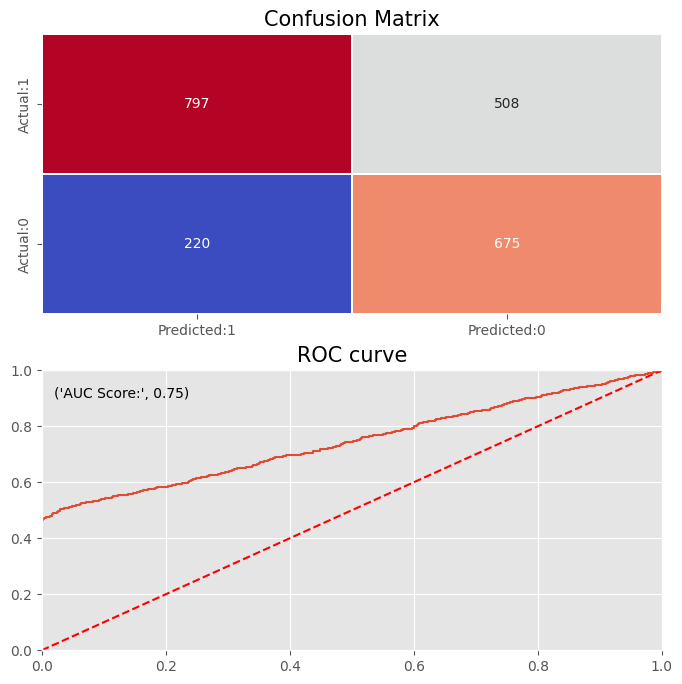

In [96]:
#XGBoost
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.subplot(2, 1, 1)
confusion_matrix_plot(xgb)

plt.subplot(2, 1, 2)
roc_auc_plot(xgb)

plt.show()

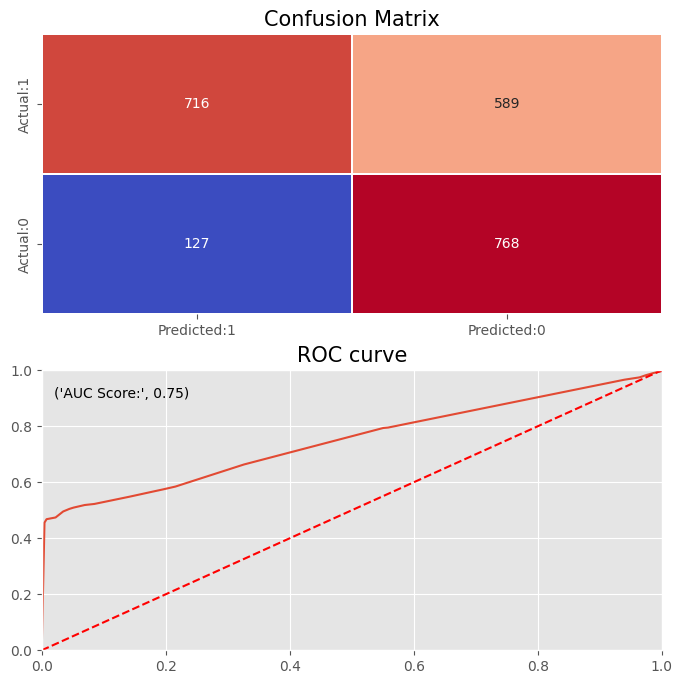

In [97]:
#decision tree
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.subplot(2, 1, 1)
confusion_matrix_plot(decision_tree)

plt.subplot(2, 1, 2)
roc_auc_plot(decision_tree)

plt.show()


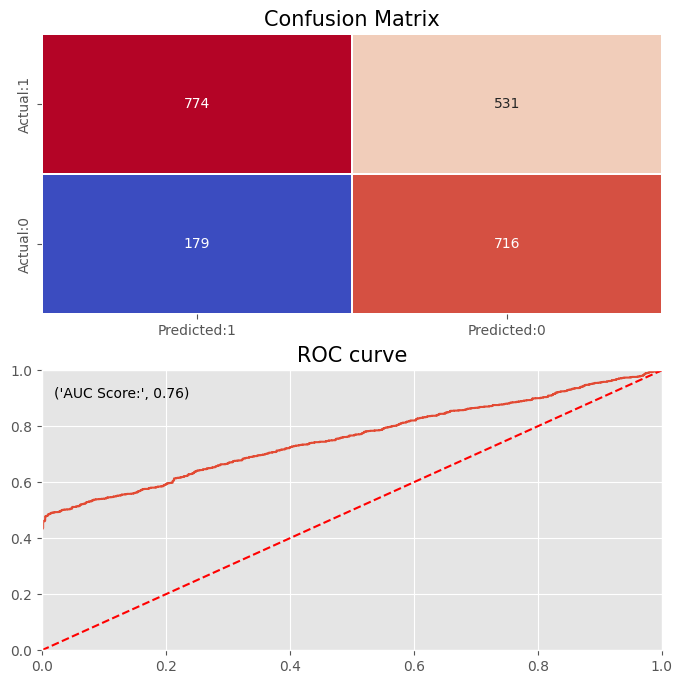

In [99]:
#Random Forest
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.subplot(2, 1, 1)
confusion_matrix_plot(rf)

plt.subplot(2, 1, 2)
roc_auc_plot(rf)

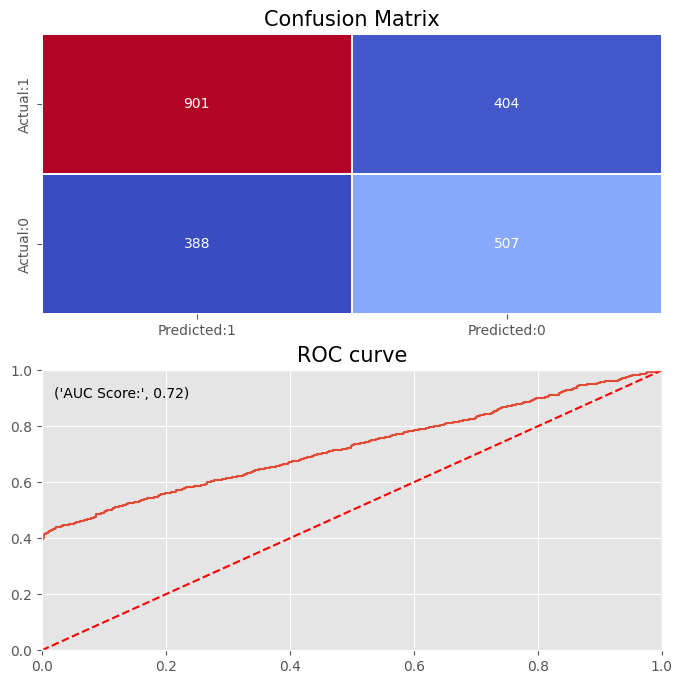

In [100]:
#Logistic Regression
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
plt.subplot(2, 1, 1)
confusion_matrix_plot(lr)

plt.subplot(2, 1, 2)
roc_auc_plot(lr)

plt.show()

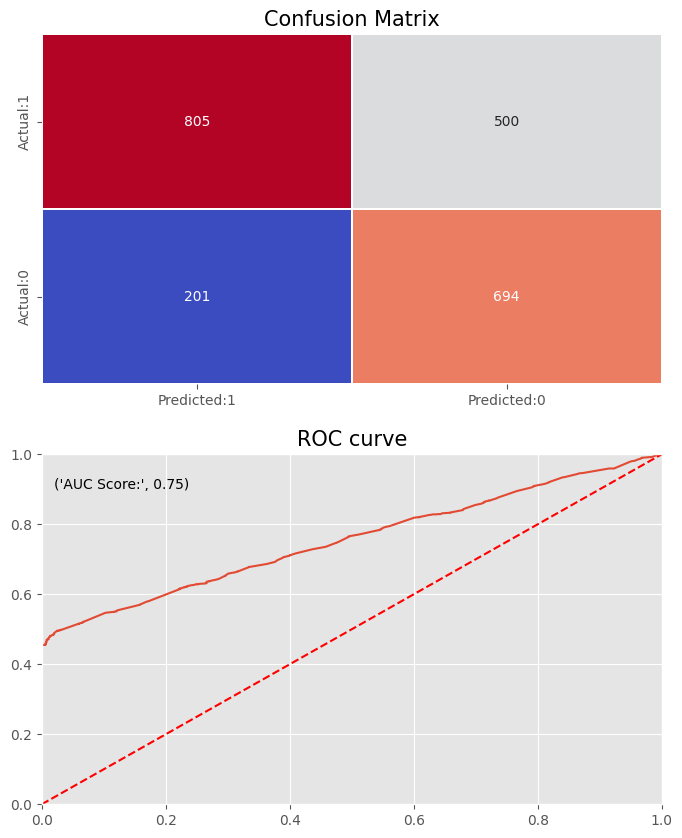

In [101]:
#ADA boost
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(adb)

plt.subplot(2, 1, 2)
roc_auc_plot(adb)

plt.show()